# Machine Learning (part 1)

**BMI 773 Clinical Research Informatics**

*Yuriy Sverchkov*

*March 23, 2020*

## Lecture Goals

* Define Machine Learning
* Define the supervised learning tasks
* Consider how to represent instances as fixed-length feature vectors
* Understand concepts
  * instance (example)
  * feature (attribute)
  * model (hypothesis)
  * training set
  * test set
  * supervised learning
  * classification
  * regression
* Describe logistic regression from a machine learning perspective
* Describe how machine learning methods are trained and evaluated

In [4]:
# Initialization code
# Imports:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Some Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['backend'] = 'agg'
#%matplotlib ipympl
# Random seed:
np.random.seed(48748)

# Load Breast Cancer Data
data = load_breast_cancer()

## What is Machine Learning?

> The study of algorithms that improve their __performance__ at some __task__ with __experience__.

*(paraphrased from Mitchell, T. (1997) Machine Learning)*


### Example: breast cancer diagnosis

![UCI Breast Cancer Wisconsin Sample Image](images/uci-breast-cancer.jpg)

* __Task:__ given fine needle aspirate images of biopsy samples, classify samples as benign vs. malignant
* __Performance:__ minimize misclassifications
* __Experience:__ samples known to be benign and samples known to be malignant

## Supervised Learning

* The supervised learning **task** is usually to learn a model that estimates the value of a *target* attribute given other attributes (*features*) of a sample (*instance*).
  * Classification - the target is *categorical* and takes one value out of a finite set
  * Regression - the target is a number that can take values in some continuous range

* In supervised learning, the **experience** the algorithm receives is samples with known target values.

Other types of learning could be

* Unsupervised - the algorithm sees samples without known target values
* Semi-supervised - the algorithm sees a mix of samples with and without target values
* Active learning - the algorithm chooses which samples to observe

### Example: breast cancer diagnosis

Based on data from the Breast Cancer Wisconsin UCI dataset (O.L. Mangasarian, W.N. Street and W.H. Wolberg. Operations Research 1995)

* __Features:__ properties of images of cell nuclei
> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
* __Target:__ *malignant* or *benign*
  * This is a *classification* task


| Features: | radius | texture | perimiter | area | ... | | target class |
|------------|--------|---------|-----------|------|-----|----|----|
|$\mathbf x^{(1)} = \langle$ | 17.99, | 10.38, | 122.8, | 1001. | $\ldots$ | $\rangle$ | $y^{(1)}=$ Malignant |
|$\mathbf x^{(2)} = \langle$ | 20.57, | 17.77, | 132.9, | 1326. | $\ldots$ | $\rangle$ | $y^{(2)}=$ Malignant |
|$\mathbf x^{(3)} = \langle$ | 13.08, | 15.71, | 85.63, | 520. | $\ldots$ | $\rangle$ | $y^{(3)}=$ Benign |
| $\vdots$ | | | | | | | $\vdots$ |

This is a **fixed-length vector** representation for the features.

### Supervised learning as function learning

In supervised learning our *task* is to learn a *model* that estimates the value of a *target* from *features* for each sample.
Mathematically, the model is expressed as a *function*:

$$ \overbrace{f}^\text{model}( \underbrace{\mathbf{x}}_{\text{features}} ) = \overbrace{\hat y}^{\text{estimate of target}} $$

* Our task is to learn a function $f$ that yields accurate estimates $\hat y$.
* Which function $f$ *minimizes* the mismatch between $y$ and $\hat y$?
* The mismatch is often expressed as a **cost function** $\textrm{cost}(y, \hat y)$.

## Logistic Regression

* Logistic regression is a model used in binary classification
* In binary classification there are two possible values for the target variable $y$, which we can assign to the values 0 and 1

* The model then takes the form

$$ \begin{align}
\text{Probability}(y=1) &= f_{LR}(\mathbf x, \boldsymbol \beta) \\
&= \mathrm{expit}(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d) \\
&= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d )}}
\end{align} $$

* The learning task consists of finding the right **parameters** (in this case also *weights*) $\beta_0, \beta_1, \beta_2, \ldots, \beta_d$

### The expit function

* The __expit__ function is often called a __sigmoid__ function in machine learning.
* Defined as $$\mathrm{expit}(x) = \frac{1}{1 + e^{-x}}$$
* S-shaped: 'squashes' values from its unbounded domain $(-\infty, +\infty)$ to a range between 0 and 1.

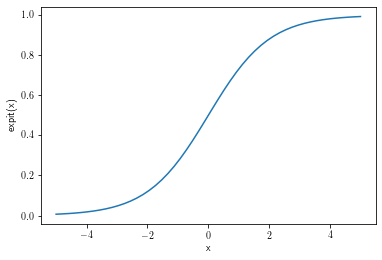

In [5]:
# Plot expit
x = np.linspace(-5,5,50)
y = expit(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('expit(x)')
plt.show()

# point out the parameters
# how to learn -- what is the cost function?
# run on breast cancer data


### Cost function

The cost function used in learning a logistic regression model is called the **cross-entropy loss**, specifically:

$$ \mathrm{cost}(y, \hat y) =
 \begin{cases}
  -\log( \hat y ) & \text{ if }y=1 \\
  -\log( 1-\hat y ) & \text{ if }y=0
 \end{cases} $$

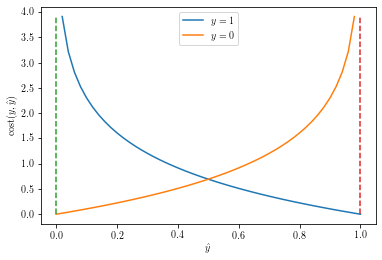

In [26]:
# Plot loss function for y=1, y=0
x1 = np.linspace(1, 0, 50, endpoint=False)
y1 = -np.log(x1)
x0 = 1-x1
y0 = -np.log(1-x0)

ax = plt.subplot(1,1,1)
ax.plot(x1, y1, label=r'$y=1$')
ax.plot(x0, y0, label=r'$y=0$')
ax.plot([0,0], [0,max(y0)], linestyle ='--')
ax.plot([1,1], [0,max(y0)], linestyle ='--')
ax.set_xlabel(r'$\hat y$')
ax.set_ylabel(r'$\mathrm{cost}(y, \hat y)$')
ax.legend(loc='best')

plt.show()


### Learning/training/fitting

*Learning the LR model - finding the right parameter values - is also called *fitting* (statistics) or *training* (ML).

To fit a logistic regression model to a dataset $(\mathbf x^{(1)}, y^{(1)}), \ldots, (\mathbf x^{(n)}, y^{(n)})$, we find the values of $\beta$ that minimize the sum of the sample-wise costs:

$$ \hat{\boldsymbol \beta} = \underset{\boldsymbol \beta}{\arg \min} \sum_{i=1}^n \mathrm{cost}(y^{(i)}, f_{LR}(\boldsymbol \beta^{(i)}, \mathbf x^{(i)})) $$

* A mathematical problem where the task is to find the minimum or maximum of a function is called an **optimization problem**.
* There are various numerical methods for solving such optimization problems. 

### Generalization

The primary objective in supervised learning is to find a model that is **generalizes** - one that accurately estimates $y$ for previously unseen $\mathbf x$.

> Is a sample that is not in my data malignant or benign?

When logistic regression is used as a regression analysis tool in statistics, the goal is to obtains estimates of the $\beta$ coefficients.

1. The model is fit to the entirety of a collected dataset
2. The coefficients are interpreted

![](images/regression-analysis-process.svg)

When we view LR as a machine learning method, our goal is somewhat different: we want to learn a classifier that generalizes well to unseen instances.

1. The research data is split into a __test set__ and a __training set__
2. The model is fit to (*trained on*) the training set
3. We evaluate how well the model generalizes using a test set

![](images/ml-process.svg)

| LR regression analysis (statistics) | | LR for classification (ML) |
|----|----|----|
| ![](images/regression-analysis-process.svg) | | ![](images/ml-process.svg) |

Let's set up a test set and a training set for our dataset:

In [7]:
# Scikit-Learn has a handy tool for creating a random train-test split
features_train, features_test, target_train, target_test = \
    train_test_split(data.data, data.target, test_size=0.3, stratify = data.target)

In [8]:
# Let's fit a logistic regression model to the test set
lr = LogisticRegression(penalty='none', solver='saga', max_iter = 100000).fit(features_train, target_train)

Logistic regression model coefficients learned for the Breast Cancer Wisconsin dataset:

In [9]:
# We can inspect the learned coefficients and intercept
pd.DataFrame(np.append(lr.intercept_, lr.coef_), columns = ['Coefficient'], index = np.append("Intercept", data.feature_names))

,Coefficient
Intercept,0.001733
mean radius,0.012246
mean texture,0.006294
mean perimeter,0.066484
mean area,0.015626
mean smoothness,0.000084
mean compactness,-0.000200
mean concavity,-0.000402
mean concave points,-0.000171
mean symmetry,0.000164


Let us see how well our model performs on the test set and the training set

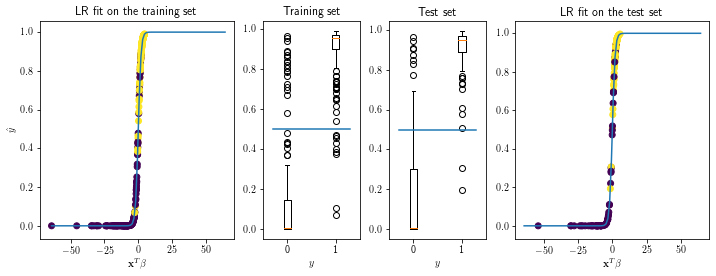

In [18]:
# We can visualize the logistic function fits and classification box plots

xbeta_train = np.dot(features_train, lr.coef_.transpose()) + lr.intercept_
xbeta_test = np.dot(features_test, lr.coef_.transpose()) + lr.intercept_

yhat_train = lr.predict_proba(features_train)[:,1]
yhat_test = lr.predict_proba(features_test)[:,1]

xbeta_limit = max(max(abs(xbeta_train)), max(abs(xbeta_test)))

x_line = np.linspace(-xbeta_limit, xbeta_limit, 100)
y_line = expit(x_line)

# Prepare 4 subplots
_, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, gridspec_kw={'width_ratios': [2,1,1,2]}, figsize=(12,4))

# Logistic fit on the training set
#ax1 = 
ax1.plot(x_line, y_line)
ax1.scatter(xbeta_train, yhat_train, c=target_train)
ax1.set_xlabel(r'$\mathbf x^T \beta$')
ax1.set_ylabel(r'$\hat y$')
ax1.set_title('LR fit on the training set')

# Logistic fit on the test set
#ax4 = plt.subplot(1,4,4)
ax4.plot(x_line, y_line)
ax4.scatter(xbeta_test, yhat_test, c=target_test)
ax4.set_xlabel(r'$\mathbf x^T \beta$')
#ax4.set_ylabel(r'$\hat y$')
ax4.set_title('LR fit on the test set')

# We can compare the training set and the test set by plotting y-hat vs y
yhat_train_ps = yhat_train[target_train == 1]
yhat_train_ns = yhat_train[target_train == 0]
yhat_test_ps = yhat_test[target_test == 1]
yhat_test_ns = yhat_test[target_test == 0]

#ax2 = plt.subplot(1,4,2)
ax2.boxplot([yhat_train_ns, yhat_train_ps], positions=[0,1])
#ax2.set_ylabel(r'$\hat y$')
ax2.set_xlabel(r'$y$')
ax2.set_title('Training set')
ax2.plot([-0.3,1.3], [0.5,0.5])

#ax3 = plt.subplot(1,4,3)
ax3.boxplot([yhat_test_ns, yhat_test_ps], positions=[0,1])
#ax3.set_ylabel(r'$\hat y$')
ax3.set_xlabel(r'$y$')
ax3.set_title('Test set')
ax3.plot([-0.3,1.3], [0.5,0.5])

plt.show()

One way to convert the estimate $\hat y$ that the model gives (a probability) to a class label (0 or 1) is to use a threshold, and a natural choice would be 0.5.

## Confusion matrix
Given such a threshold, we can compute a *confusion matrix* and various derived metrics:

| | Condition Positive | Condition Negative | |
|----|----|----|----|
| **Predicted Positive** | True positive (TP) | False positive (FP) | **Precision** or **Positive predictive value** $\frac{TP}{TP+FP}$ |
| **Predicted Negative** | False negative (FN) | True negative (TN) | |
| | **True positive rate** or **Recall** or **Sensitivity** $\frac{TP}{TP+FN}$ | **False positive rate** $\frac{FP}{FP+TN}$ | $F_1 = 2 \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$ |
| | **False negative rate ** $\frac{FN}{TP+FN}$ | **Specificity** or **True negative rate** $\frac{TN}{FP+TN}$ |

*The [Wikipedia article](https://en.wikipedia.org/wiki/Confusion_matrix) has a more complete illustration of derived metrics*

### Confusion matrix and derived metrics for our dataset

| | Condition Positive | Condition Negative | |
|----|----|----|----|
| **Predicted Positive** | True positive (TP) | False positive (FP) | **Precision** or **Positive predictive value** $\frac{TP}{TP+FP}$ |
| **Predicted Negative** | False negative (FN) | True negative (TN) | |
| | **True positive rate** or **Recall** or **Sensitivity** $\frac{TP}{TP+FN}$ | **False positive rate** $\frac{FP}{FP+TN}$ | $F_1 = 2 \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$ |
| | **False negative rate ** $\frac{FN}{TP+FN}$ | **Specificity** or **True negative rate** $\frac{TN}{FP+TN}$ |

In [11]:
# Print confusion matrix
tp = sum(yhat_test_ps > 0.5)
fn = sum(yhat_test_ps <= 0.5)
fp = sum(yhat_test_ns > 0.5)
tn = sum(yhat_test_ns <= 0.5)
pd.DataFrame( [[tp, fp],[fn, tn]], columns = ["$y=1$", "$y=0$"], index = ["$\hat y > 0.5$", "$\hat y \leq 0.5$"])

,$y=1$,$y=0$
$\hat y > 0.5$,105,13
$\hat y <= 0.5$,2,51


In [30]:
# Print pretty table with precision, recall, and F1

prec = tp/(tp+fp)
rec = tp/(tp+fn)
fpr = fp/(fp+tn)
spec = tn/(fp+tn)
f1 = 2*prec*rec/(prec+rec)

pd.DataFrame([[prec, rec, fpr, spec, f1]], columns=["Precision", "Recall", "False positive rate", "Specificity", "F1-score" ], index=[''])

,Precision,Recall,False positive rate,Specificity,F1-score
,0.889831,0.981308,0.203125,0.796875,0.933333


## ROC Curves

* When we have a classifier that yields continuous scores, instead of considering just one threshold, we can also vary the threshold, obtaining a sequence of confusion matrices.
* A **Reciever Operating Characteristic (ROC) Curve** is one way to evaluate how a classifier performs across all threshold values.
* It is a plot of the true positive rate (also sensitivity, recall) against the false positive rate (also "1 - specificity")

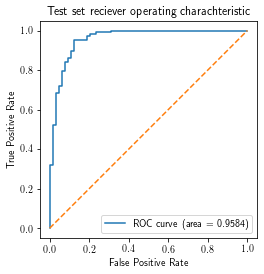

In [13]:
# Plot ROC
fpr, tpr, _ = roc_curve(target_test, yhat_test)
roc_auc = auc(fpr, tpr)

ax = plt.subplot(1,1,1)
ax.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
ax.plot([0,1],[0,1], linestyle = '--')
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Test set reciever operating charachteristic')
ax.legend(loc='lower right')

plt.show()

The area under the curve is typically used as a summary metric.